In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import load_processed_data as ld
from definitions import MODELS_PATH
from sklearn import metrics
from keras.models import load_model

In [2]:
# model file pathname
model_file_path = MODELS_PATH + 'model_myCNNbase_myNNclf.h5'

# load model
m = load_model(model_file_path)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [3]:
# load test data
X, y_ohe, _ = ld.load_test_data()

# convert y_ohe to a single column of encoded class labels
# NOTE: this implementation assumes y_ohe is correct without checking
y_true = np.argmax(y_ohe,
                   axis=1)

# get class labels
y_labels = ld.get_y_ohe_class_names()

# get class names in a format that is presentable
y_class_titles = [s.replace('_',' ').title() for s in y_labels]

# get model predictions
y_pred = m.predict_classes(X/255.)
y_pred_proba = m.predict_proba(X/255.)

# Confusion Matrix

In [4]:
# confusion matrix
cm = metrics.confusion_matrix(y_true, y_pred)

In [5]:
# set MultiIndex index and columns
index = pd.MultiIndex.from_product([['Actual Class'],
                                   y_class_titles])
columns = pd.MultiIndex.from_product([['Predicted Class'],
                                     y_class_titles])

# dataframe with the confusion matrix
df_cm = pd.DataFrame(data=cm,
                     index=index,
                     columns=columns)

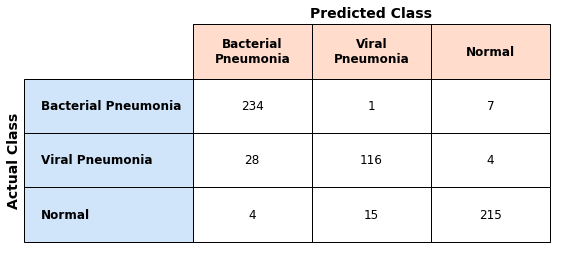

In [124]:
# create a figure
fig = plt.figure(figsize=(6.4, 4))

# get the figure's axis
ax = fig.gca()

# do not display the axis
ax.axis('off')

# create a table from the pivot table
t = ax.table(cellText=df_cm.values,
             cellLoc='center',
             rowLabels=df_cm.index.get_level_values(1),
             colLabels=df_cm.columns.get_level_values(1).str.replace(' ','\n'),
             loc='right',
             bbox=[0, 0, 1, 1])

ax.text(0.5, 1.05, s='Predicted Class', fontweight='bold', fontsize=14, ha='center', va='center')
ax.text(-0.5, 0.375, s='Actual Class', fontweight='bold', fontsize=14, ha='center', va='center', rotation=90)


# format the cells
for x in range(3):
    t[0, x].set_facecolor('#ffdccc')  # light orange
    t[0, x].set_text_props(fontweight='bold')

for y in np.arange(1, 4):
    t[y, -1].set_facecolor('#d1e5fa')  # light blue
    t[y, -1].set_text_props(fontweight='bold')

# set the font size
t.auto_set_font_size(False)
t.set_fontsize(12)

#fig.savefig('test.png', bbox_inches='tight')